<a href="https://colab.research.google.com/github/MatthiasSimons/covid-analysis/blob/main/covid_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programmierung und Auswertung großer Datenmengen
## Einfluss des Entwicklungs- und Wohlstand auf die Covid-19 Pandemie
-> Einfluss auf Wirtschaft/Entwicklung (BIP)
-> Prognose BIP

# Einleitung
...

Vorgehensweise


*   Importieren
*   Bereinigen
*   Modifizieren
*   Modellieren
*   Validieren
*   Bewerten
*   Zusammenfassen

# Gliederung
CRoos Industry Standard Process for Data Mining (CRISP-DM)

1.   Business Understanding
2.   Data Understanding
3.   Data Preperation
4.   Modelling
5.   .... 



## Vorbereitung

Importieren der Bibliotheken



In [509]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

import folium
import missingno as msno
import pycountry_convert as pc
from IPython.display import HTML

# 1. Business Understanding
## 1.1 Was bedeuted Wohlstand und Entwicklung?
Kennzahlen:
- Bruttoinlandsprodukt
    - Klassifizieren
- Human Development Index

## 1.2 Wie kann der Pandemie Verlauf bewertet werden?
Kennzahlen:
- Reproduktionszahl
- Inzidenz
- Sterbe-, Impfrate
- strenge der Regeln (stringency Index)

# 2. Data Understanding

Datensatz von "Our World in Data"

| Metrics                     | Source                                                    | Updated | Countries |
|-----------------------------|-----------------------------------------------------------|---------|-----------|
| Vaccinations                | Official data collated by the Our World in Data team      | Daily   | 209       |
| Tests & positivity          | Official data collated by the Our World in Data team      | Weekly  | 129       |
| Hospital & ICU              | Official data collated by the Our World in Data team      | Weekly  | 34        |
| Confirmed cases             | JHU CSSE COVID-19 Data                                    | Daily   | 191       |
| Confirmed deaths            | JHU CSSE COVID-19 Data                                    | Daily   | 183       |
| Reproduction rate           | Arroyo-Marioli F, Bullano F, Kucinskas S, Rondón-Moreno C | Daily   | 182       |
| Policy responses            | Oxford COVID-19 Government Response Tracker               | Daily   | 181       |
| Other variables of interest | International organizations (UN, World Bank, OECD, IHME…) | Fixed   | 218       |

source: https://github.com/owid/covid-19-data/blob/master/public/data/README.md

## 2.1 Importieren der Daten

In [2]:
# the dataset csv file is from github user owid. The file was saved for backup purposes

#dataset = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", sep=',')
#dataset.to_csv(r"data/covid-dataset.csv") #25.07.2021
dataset = pd.read_csv(r"data/covid-dataset.csv", sep=',')
dataset.name ="Dataset"
dataset["date"] = pd.to_datetime(dataset["date"])
#dataset = dataset.set_index(["continent", 'location', 'date'])

pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
dataset.head(2)

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality
0,0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.89e+07,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,NaN
1,1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,3.89e+07,54.42,18.6,2.58,1.34,1803.99,NaN,597.03,9.59,NaN,NaN,37.75,0.5,64.83,0.51,NaN


## 2.2 Beschreibung der Daten

Bei dem Datensatz handelt es sich um einen Datensatz der die Entwicklung der Covid-19 Fallzahlen weltweit täglich abbildet. Der Datensatz wird mithilfe der Bibliothek pandas_profiling zusammengefasst. beinhaltet 61 Spalten. In der folgenden Tabelle wird die Quelle der Spalten und eine kurze Beschreibung dargestellt. 

In [3]:
# the description csv file is from github user owid. The file was saved for backup purposes
#description = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv", sep=',')
#description.to_csv(r"data/covid-dataset_column-description.csv") #25.07.2021
pd.read_csv(r"data/covid-dataset_column-description.csv")

,Unnamed: 0,column,source,description
0,0,iso_code,International Organization for Standardization,ISO 3166-1 alpha-3 – three-letter country codes
1,1,continent,Our World in Data,Continent of the geographical location
2,2,location,Our World in Data,Geographical location
3,3,date,Our World in Data,Date of observation
4,4,total_cases,COVID-19 Data Repository by the Center for Sys...,Total confirmed cases of COVID-19
5,5,new_cases,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19
6,6,new_cases_smoothed,COVID-19 Data Repository by the Center for Sys...,New confirmed cases of COVID-19 (7-day smoothed)
7,7,total_deaths,COVID-19 Data Repository by the Center for Sys...,Total deaths attributed to COVID-19
8,8,new_deaths,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19
9,9,new_deaths_smoothed,COVID-19 Data Repository by the Center for Sys...,New deaths attributed to COVID-19 (7-day smoot...


Im folgenden wird untersucht welche Datentypen vertreten sind. Es sind überwiegend numerische Werte

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104801 entries, 0 to 104800
Data columns (total 61 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Unnamed: 0                             104801 non-null  int64         
 1   iso_code                               104801 non-null  object        
 2   continent                              99925 non-null   object        
 3   location                               104801 non-null  object        
 4   date                                   104801 non-null  datetime64[ns]
 5   total_cases                            100604 non-null  float64       
 6   new_cases                              100601 non-null  float64       
 7   new_cases_smoothed                     99591 non-null   float64       
 8   total_deaths                           90311 non-null   float64       
 9   new_deaths                             90466 non

# 3. Data Preperation

## 3.1 Auswahl der relevanten Daten und Länder

Aus dem Datensatz werden vorerst die relevanten Daten ausgewählt. Relevante Daten sind unteranderem:

    - kumulierte Impf-, Fall- und Todeszahlen pro eine Millionen Einwohner
    - mittlere Reproduktionszahl
    - Brutto-Inlandsprodukt
    - Maßnahmen ("Stringency Index")
    - Anzahl Krankehausbetten pro Einwohner

Desweiteren wird die Korrelation der Variabeln betrachtet. Zur Vermeidung von Multikollinearität werden Variabeln mit hoher Korrelation zusammengefasst oder rausgeschmissen. Dies kann am Beispiel des Index der menschlichen Entwicklung (Human Development Index) kurz HDI erläutert werden. Der Indix setzt sich aus drei Dimensionen zusammen die aus vorhandenen Spalten abgebildet werden.
1. Lebenserwartungsindex -> life_expectancy / median_age
2. Bildungsindex
3. Einkommensindex -> gdp_per_capita

Die Auswahl der Daten ist ein sehr iterativer Prozess.

In [406]:
columns_of_interest = [
    'date',
    'location',
    'continent',
    'total_cases_per_million',
    'total_deaths_per_million',
    "new_cases_per_million",
    "new_deaths_per_million",
    
    #'reproduction_rate',
    'people_fully_vaccinated_per_hundred',
    #'stringency_index',
    #'population_density',
    #'median_age',
    #'gdp_per_capita',
    #'life_expectancy',
    "hospital_beds_per_thousand",
    'human_development_index',   
]

filtered_dataset = dataset.drop(dataset.columns.difference(columns_of_interest), 1)

print("von ursprünglich {} Spalten bleiben noch {} Spalten".format(len(dataset.columns.tolist()), len(columns_of_interest)))
cleaned_dataset.head(2)

von ursprünglich 61 Spalten bleiben noch 10 Spalten


,continent,location,date,total_cases_per_million,total_deaths_per_million,people_fully_vaccinated_per_hundred,hospital_beds_per_thousand,human_development_index
0,Asia,Afghanistan,2020-02-24,0.03,0.03,0.14,0.5,0.51
1,Asia,Afghanistan,2020-02-25,0.03,0.03,0.14,0.5,0.51


Ähnliche Variabeln mit hoher Korrelation werden gelöscht -> ähnlicher Informationsgehalt; so simpel wie möglich
- r = 0.1 für eine geringe Korrelation
- r = 0.3 für eine mittlere Korrelation
- r = 0.5 für eine hohe Korrelation

Quelle: http://www.methoden-psychologie.de/wertebereich_korrelationen.html

total_cases_per_million              total_deaths_per_million               0.8
hospital_beds_per_thousand           human_development_index                0.6
new_cases_per_million                new_deaths_per_million                 0.5
people_fully_vaccinated_per_hundred  total_cases_per_million                0.5
total_cases_per_million              new_cases_per_million                  0.4
total_deaths_per_million             new_deaths_per_million                 0.4
total_cases_per_million              human_development_index                0.4
human_development_index              total_deaths_per_million               0.3
new_deaths_per_million               total_cases_per_million                0.3
total_deaths_per_million             new_cases_per_million                  0.3
human_development_index              people_fully_vaccinated_per_hundred    0.3
                                     new_cases_per_million                  0.3
dtype: float64

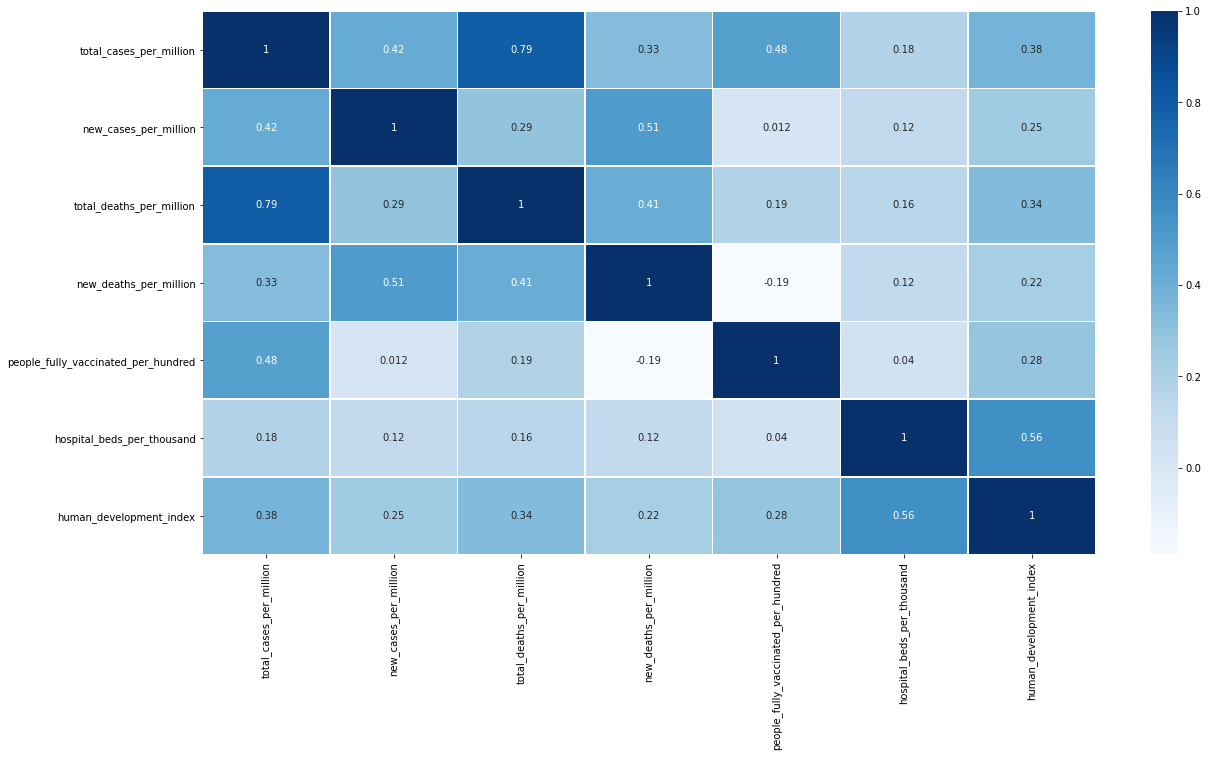

In [407]:
corr = filtered_dataset.corr()
#corr = corr[abs(corr)>0.3]
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, linewidths=.5, cmap=sns.color_palette("Blues", as_cmap=True))

sorted_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
sorted_corr = sorted_corr[sorted_corr != 1].round(1)
sorted_corr = sorted_corr[abs(sorted_corr) >= 0.3]
sorted_corr

## 3.2 Prüfen und Verbessern der Datenqualität

Für spätere Untersuchungen und Modelle ist eine qualitativ gut Datenbasis notwendig. Aus diesem Grund wird im folgenden die Datenqualität geprüft und der Umgang mit fehlenden Werten behandelt.

Es gibt verschiedene Gründe für fehlende Werte:

- Daten werden im Land nicht gemessen oder sind nicht verfügbar
    - In einigen Ländern ist eine schlechtere Dateninfrastruktur vorhanden
    - Umgang: Land nicht betrachten
    

- Daten waren zum Zeitpunkt noch nicht verfügbar
    - Impfstoffe mussten erst entwickelt werden, deswegen sind zum Beginn der Pandemie keine Werte angegeben
    - Umgang: Fehlende Werte durch sinnvolle Werte ersetzen. Bspw: Anzahl Impfungen bis zur ersten Impfung durch "0" ersetzen

Wichtig ist auf die Korrelation zur Zielvariabel und auf Variablen mit hohem Informationsgehalt zu achten. Fraglich ist auch ob Werte aufgrund der Wirtschaftlichen Lage eines Landes fehlen.

Es werden folgende Regeln aufgestellt:
- Anteil fehlender Werte in Spalte > 30-40 % -> Spalte löschen
- Anteil fehlender Werte in Zeile > 20 % -> Zeile löschen



**In welchen Spalten fehlen Werte?**

In [408]:
#cleaned_dataset = filtered_dataset
100*cleaned_dataset.isna().sum()/cleaned_dataset.isna().count()

continent                               4.65
location                                0.00
date                                    0.00
total_cases_per_million                 4.51
new_cases_per_million                   4.52
total_deaths_per_million               14.32
new_deaths_per_million                 14.18
people_fully_vaccinated_per_hundred    85.27
hospital_beds_per_thousand             18.56
human_development_index                10.44
dtype: float64

In der Spalte "people_fully_vaccinated_per_hundred" fehlen 85 %  der Werte. Wie bereits beschrieben, fehlen die Werte vermutlich aufgrund der späten Einführung von Impfstoffen. Aus diesem Grund werden die fehlenden Werte durch "0" ersetzt.

In [409]:
# Impfdaten waren zum Beginn der Pandemie noch nicht vorhanden

cols_to_fill = [
    "people_fully_vaccinated_per_hundred", "total_deaths_per_million", "total_cases_per_million"]

def fill_nan_values(series):
    nr = cleaned_dataset[series].isna().sum()
    cleaned_dataset[series].backfill(0, inplace = True)
    cleaned_dataset[series].interpolate(inplace = True)
    print("In der Spalte {} wurden die fehlenden Werte von {} auf {} reduziert".format(series, nr, cleaned_dataset[series].isna().sum()))

for column in cols_to_fill:
    fill_nan_values(column)

# continents has been tracked as countries 
continent_list = cleaned_dataset[cleaned_dataset["continent"].isna() == True].index.get_level_values(0).unique().tolist()
cleaned_dataset.drop(continent_list, inplace = True)

In der Spalte people_fully_vaccinated_per_hundred wurden die fehlenden Werte von 89369 auf 0 reduziert
In der Spalte total_deaths_per_million wurden die fehlenden Werte von 15011 auf 0 reduziert
In der Spalte total_cases_per_million wurden die fehlenden Werte von 4731 auf 0 reduziert


**In welchen Ländern fehlen Werte?**

Es werden noch 164 von ursprünglich 222 Ländern betrachtet


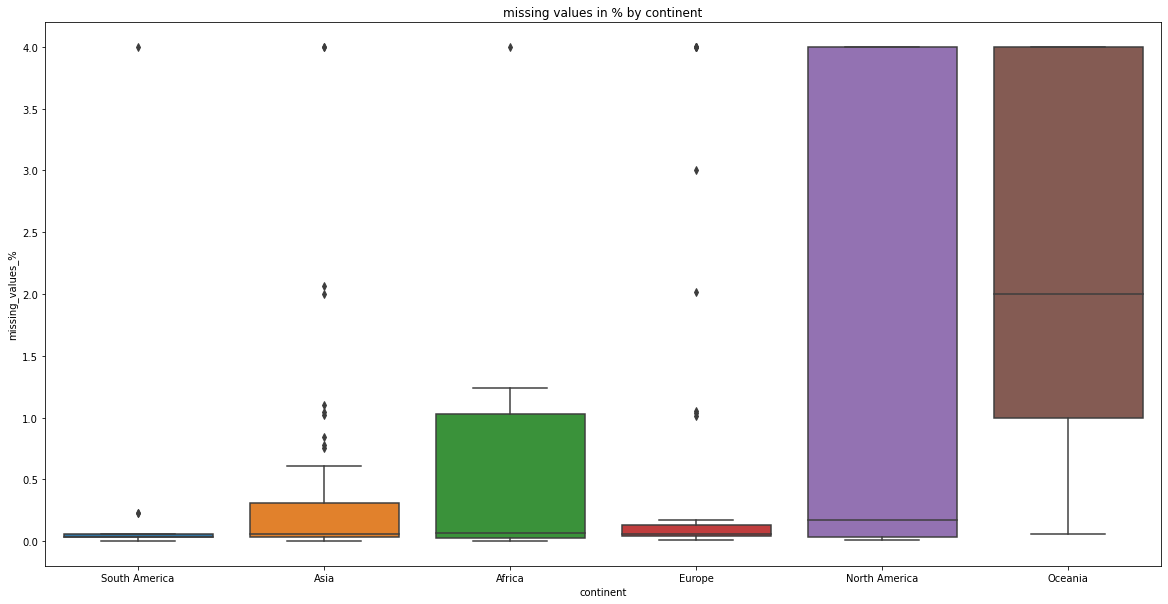

In [501]:
def continent_from_location(location):
    return list(dict.fromkeys(cleaned_dataset[cleaned_dataset["location"] == location]["continent"].values.tolist()))[0]

def get_locations():
    return list(dict.fromkeys(cleaned_dataset["location"].values.tolist()))

def get_missing_values(location):
    missing_values = cleaned_dataset[cleaned_dataset["location"] == location].isna().sum()
    values = cleaned_dataset[cleaned_dataset["location"] == location].isna().count()

    return (missing_values/values).sum()

locations_continent_dic = {}

for location in get_locations():
    locations_continent_dic[location] = (continent_from_location(location),get_missing_values(location))

missing_values_df = pd.DataFrame(data=locations_continent_dic).T.rename(columns={0: "continent", 1: "missing_values_%"})
missing_values_df.sort_values(by="missing_values_%", inplace=True)

# plot missing values by continent
fig, ax = plt.subplots(figsize=(20,10))
plt.title(("missing values in % by continent"))
sns.boxplot(x="continent", y="missing_values_%", data=missing_values_df)

missing_values_df = missing_values_df[missing_values_df["missing_values_%"]<=1]

countries = missing_values_df.index

countries_cleaned_dataset = cleaned_dataset[cleaned_dataset["location"].isin(countries)] 

print("Es werden noch {} von ursprünglich {} Ländern betrachtet".format(len(missing_values_df), len(get_locations())))

#missing_values_df.head()



**Wann fehlen Werte?**

Datenlage zu beginn der Pandemie schlecht

Juli 2021 Datenlage wird schlechter

,continent,location,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_fully_vaccinated_per_hundred,hospital_beds_per_thousand,human_development_index
date,,,,,,,,,
2021-07-23,0,0,0,0,0,4,0,0,0
2021-07-24,0,0,0,0,0,4,0,0,0


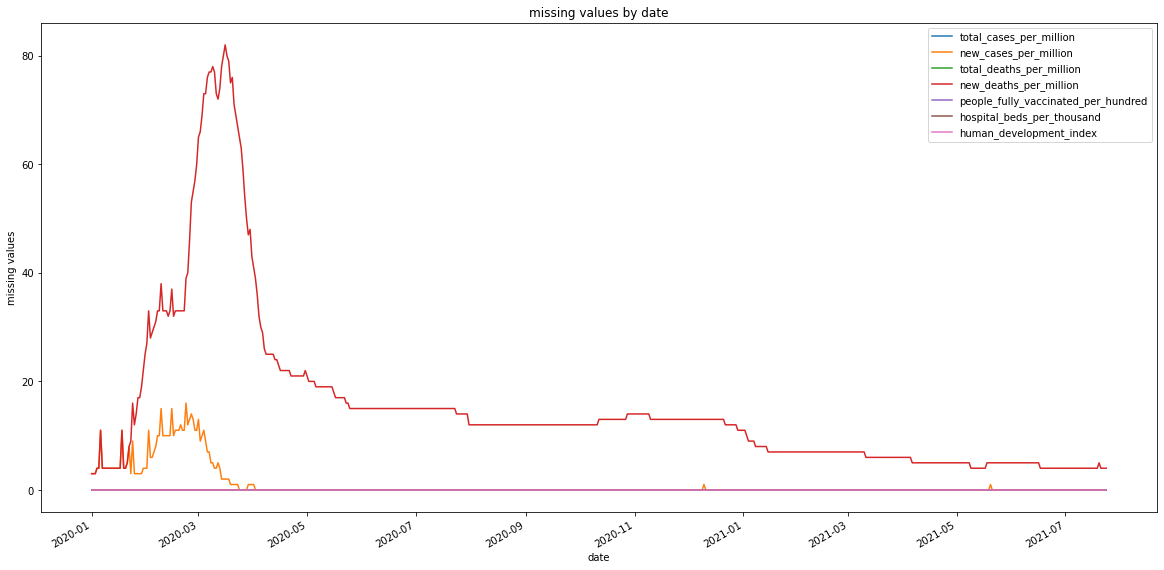

In [411]:
missing_values_by_date = countries_cleaned_dataset.set_index('date').isna().sum(level=0)
missing_values_by_date.drop(["continent", "location"],axis=1).plot(
    figsize=(20,10),
    title = "missing values by date",
    xlabel="date",
    ylabel="missing values",

)

start = "2020-06-01"
end = "2021-07-01"

date_cleaned_dataset = countries_cleaned_dataset[countries_cleaned_dataset["date"] <= end]
date_cleaned_dataset = date_cleaned_dataset[date_cleaned_dataset["date"] >= start]

#plt.fill_betweenx(x1=start, x2=end, y= "120",color="g")

missing_values_by_date.sort_index().tail(2)

Abschließend werden die restlichen Zeilen mit fehlenden Werte gelöscht

In [514]:
date_cleaned_dataset = date_cleaned_dataset.dropna()

## 3.3 Feature Engineering - Kennzahlen

Index der menschlichen Entwicklung:"human_development_index"

mortality: 'total_deaths_per_million' / 'total_cases_per_million'

Impfrate: 'people_fully_vaccinated_per_hundred'

In [515]:
final_dataset = date_cleaned_dataset

final_dataset["mortality"] = date_cleaned_dataset['total_deaths_per_million'] / date_cleaned_dataset['total_cases_per_million']
final_dataset["people_fully_vaccinated_per_thousand"] = date_cleaned_dataset['people_fully_vaccinated_per_hundred']*10

columns_to_delete = [
    "people_fully_vaccinated_per_hundred",
    "total_deaths_per_million",
    "total_cases_per_million",

]
final_dataset = final_dataset.drop(columns_to_delete, 1)
final_dataset_grouped = final_dataset.groupby("location").mean()
#final_dataset.head()

highest correlations:
new_cases_per_million                 new_deaths_per_million                  0.6
people_fully_vaccinated_per_thousand  new_cases_per_million                   0.6
human_development_index               hospital_beds_per_thousand              0.6
new_cases_per_million                 human_development_index                 0.5
human_development_index               new_deaths_per_million                  0.4
                                      people_fully_vaccinated_per_thousand    0.4
new_cases_per_million                 hospital_beds_per_thousand              0.3
new_deaths_per_million                hospital_beds_per_thousand              0.3
dtype: float64


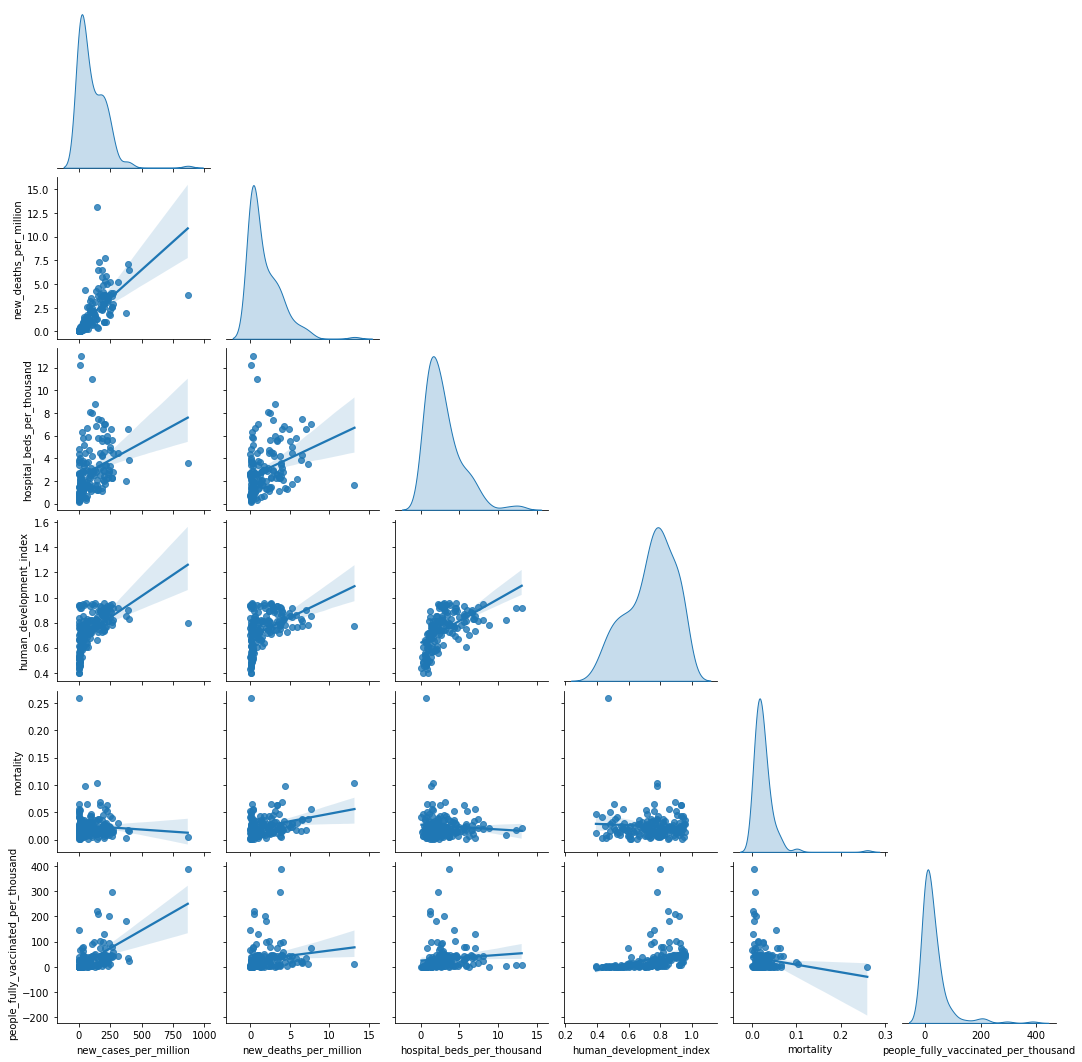

In [516]:
g = sns.pairplot(
    final_dataset_grouped, 
    corner =True, 
    diag_kind="kde", 
    kind="reg",
    #hue="continent",
    #palette=sns.color_palette("Set2")
)
#g.map_lower(sns.kdeplot, levels=4, color=".2")
corr = final_dataset_grouped.corr()

sorted_corr = corr.unstack().sort_values(ascending=False).drop_duplicates()
sorted_corr = sorted_corr[sorted_corr != 1].round(1)
sorted_corr = sorted_corr[abs(sorted_corr) >= 0.3]
print("highest correlations:")
print(sorted_corr)

# 4. Modelling

## 4.1 Daten Analyse
- Auswahl repräsentativer Länder nach
    - beste Datenlage
    - höchste Fall/Todeszahlen
    - Weltweit (verschiedene Kontinente)

In [517]:
def get_countries():
    best_countries =[]
    worst_countries =[]
    
    continents = [
        "Europe",
        "Africa",
        "Asia",
        "Oceania",
        "South America",
        "North America"
    ]
    
    for continent in continents:
        filtered_dataset = final_dataset[final_dataset["continent"]==continent].groupby("location").mean()
        worst_country = filtered_dataset.sort_values(by=["mortality", "human_development_index"], ascending=[False, False]).index[0]
        best_country = filtered_dataset.sort_values(by=["mortality", "human_development_index"], ascending=[True, False]).index[0]
        best_countries.append(best_country)
        worst_countries.append(worst_country)
    
    return list(dict.fromkeys(best_countries)), list(dict.fromkeys(worst_countries))

<AxesSubplot:xlabel='date', ylabel='new_cases_per_million'>

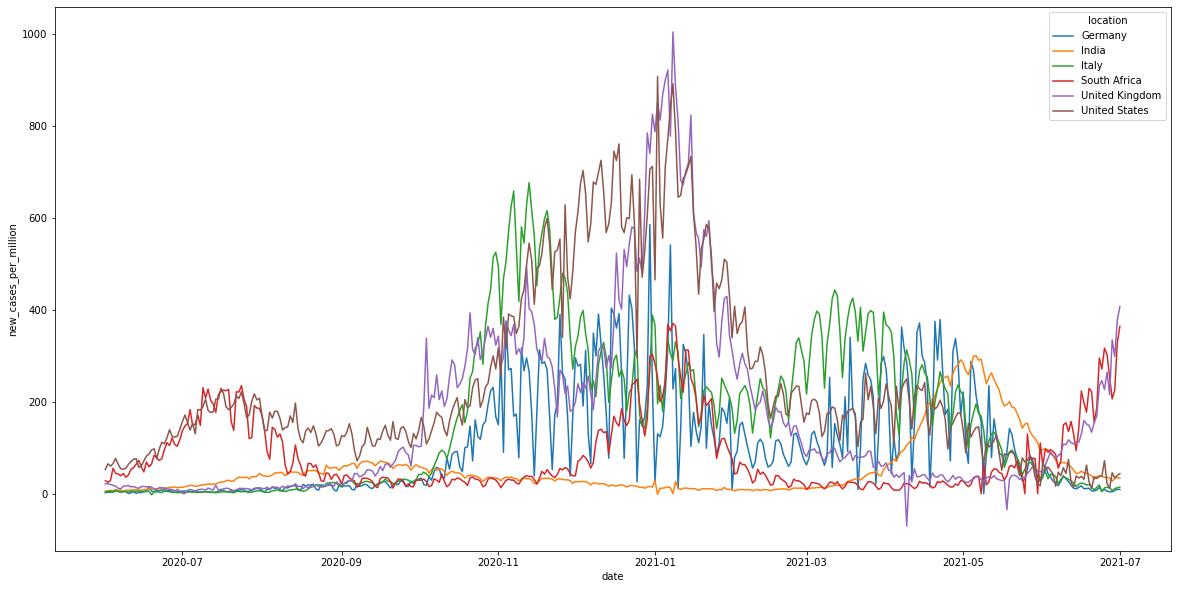

In [518]:
countries_of_interest = [
       # "China",
        "India",
        "Israel"
        "Brazil",
        "Germany",
        "United Kingdom",
        "Italy",
        "United States",
        "South Africa"
    ]

best_countries, worst_countries = get_countries()

interesting_countries_dataset = final_dataset[final_dataset["location"].isin(countries_of_interest)]
best_countries_dataset = final_dataset[final_dataset["location"].isin(best_countries)]
worst_countries_dataset = final_dataset[final_dataset["location"].isin(worst_countries)]

fig, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="date", y="new_cases_per_million", data=interesting_countries_dataset, hue="location")
#fig, ax = plt.subplots(figsize=(20,10))
#sns.lineplot(x="date", y="mortality", data=best_countries_dataset, hue="location")
#fig, ax = plt.subplots(figsize=(20,10))
#sns.lineplot(x="date", y="mortality", data=worst_countries_dataset, hue="location")

In [519]:
# Daten Analyse
# Beste Datenlage, höchste Fall/Todeszahlen und continent

# 4.2 Modellierung

**learnings bis jetzt:**

    - HDI hat großen Einfluss auf Tode und Impfungen
   
**was prognostizieren?:**
- **HDI**  -> Entwicklungsstand eines Landes

    - 0,800–1,000 (sehr hoch)
    - 0,700–0,799 (hoch)
    - 0,550–0,699 (mittel)
    - 0,350–0,549 (niedrig)

    
    - In Abhängigkeit von
        - new_cases_per_million                   
        - hospital_beds_per_thousand
        - people_fully_vaccinated_per_thousand

In [561]:
model_columns =[
    "new_cases_per_million",
    "hospital_beds_per_thousand",
    "people_fully_vaccinated_per_thousand",
    "human_development_index"
]

model_dataset = final_dataset.drop(final_dataset.columns.difference(model_columns), 1)

X = model_dataset.drop("human_development_index", axis=1)
y = model_dataset["human_development_index"]

# aufteilen in Trainings und Test Daten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

## Auswahl Algorithmus

Ziel: HDI Prognose -> Supervised Learning -> Regression

https://miro.medium.com/max/1400/0*faPhpDiJ7_pZGknr.png

Algorithmen:
1. Decision Tree
    - from sklearn import tree
2. Linear Regression
    - from sklearn.linear_model import LinearRegression
3. Neural Network
    - from sklearn.neural_network import MLPClassifier
4. Gradient Boosting Tree
    - from sklearn.ensemble import GradientBoostingRegressor
5. Random Forrest
    - from sklearn.ensemble import RandomForestRegressor

In [652]:
import datetime

**1. Decision Tree**

In [655]:
from sklearn.tree import DecisionTreeRegressor

start = datetime.datetime.now()
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

Der Score beträgt 98.85000000000001 %
0:00:00.176047


**2. Linear Regression**

In [656]:
from sklearn.linear_model import LinearRegression

start = datetime.datetime.now()
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

Der Score beträgt 40.36 %
0:00:00.025672


**3. Neural Network**

In [657]:
from sklearn.neural_network import MLPRegressor

# best results with logistic/adam
activations = ["logistic"]#["identity", "logistic", "tanh", "relu"]
solvers = ["adam"]#["lbfgs", "sgd", "adam"]

for activation in activations:
    for solver in solvers:
        try:
            start = datetime.datetime.now()
            regressor = MLPRegressor(activation=activation, solver = solver)
            regressor.fit(X_train, y_train)
            y_pred = regressor.predict(X_test)
            score = round(regressor.score(X_test, y_test),4)
            end = datetime.datetime.now()

            print('Der Score beträgt {} % (Aktivierungsfunktion: {}, Solver: {})'.format(score*100, activation, solver))
            print(end-start)
        except:
            pass

Der Score beträgt 71.36 % (Aktivierungsfunktion: logistic, Solver: adam)
0:00:06.300986


**4. Gradient Boosting Tree**

In [658]:
from sklearn.ensemble import GradientBoostingRegressor

start = datetime.datetime.now()
regressor = GradientBoostingRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

Der Score beträgt 87.83 %
0:00:05.301452


**5. Random Forrest**

In [659]:
from sklearn.ensemble import RandomForestRegressor

start = datetime.datetime.now()
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
score = round(regressor.score(X_test, y_test),4)
end = datetime.datetime.now()

print('Der Score beträgt {} %'.format(score*100))
print(end-start)

Der Score beträgt 99.16 %
0:00:11.449132


Bester Algorithmus: 
- Random Forrest

# Test

In [645]:
def classify_hdi(hdi):
    if hdi >= 0.8 and hdi<1:
        return "very high"
    elif hdi>=0.7 and hdi<0.8:
        return "high"
    elif hdi>=0.55 and hdi<0.7:
        return "medium"
    elif hdi>=0.35 and hdi<0.55:
        return "low"
    else:
        return "no data"

'medium'

In [660]:
location = "Germany"

location_indices = cleaned_dataset[cleaned_dataset["location"] == location].index
X_by_location = X[X.index.isin(location_indices)]
y_pred = round(regressor.predict(X_by_location).mean(),3)
y_real = round(y[y.index.isin(location_indices)].mean(),3)

print(y_pred,y_real)

0.945 0.947


In [661]:
## Pandemieverlauf predicten (Transferlernen) abhängig von HDI, Betten usw